In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<div class='alert alert-info'>
<h2>Series</h2>
</div>

In [2]:
tags = ['uno', 'dos', 'tres', 'cuatro']
vector = [1, 2, 3, 4]
serie = pd.Series(data=vector, index=tags)
serie

uno       1
dos       2
tres      3
cuatro    4
dtype: int64

In [3]:
serie = pd.Series(vector,tags)
serie

uno       1
dos       2
tres      3
cuatro    4
dtype: int64

In [4]:
print('Por tag: ', serie['dos'])
print('Por indice: ', serie[1])

Por tag:  2
Por indice:  2


In [5]:
# La suma se hace por tags
serie2 = pd.Series([8,7,6,5], tags)
serie_suma = serie + serie2
serie_suma

uno       9
dos       9
tres      9
cuatro    9
dtype: int64

<div class='alert alert-info'>
<h2>DataFrame</h2>
</div>

In [6]:
filas = ['f1', 'f2', 'f3', 'f4']
columnas = ['c1', 'c2', 'c3']
datos = list(map(lambda i: list(np.random.randint(1,10,3)), range(4)))

In [7]:
data = pd.DataFrame(datos, filas, columnas)
data

,c1,c2,c3
f1,2,3,5
f2,1,5,5
f3,7,6,8
f4,8,9,2


In [8]:
data['c1']  # Columna

f1    2
f2    1
f3    7
f4    8
Name: c1, dtype: int64

In [9]:
data.loc[['f1']] # Para fila por nombre usamos loc

,c1,c2,c3
f1,2,3,5


In [10]:
print('Elemento: ',type(data.loc['f1']))
print('Array de elementos', type(data.loc[['f1']]))

Elemento:  <class 'pandas.core.series.Series'>
Array de elementos <class 'pandas.core.frame.DataFrame'>


Nota que al pasar como argumento un elemento la funcion nos retorna una <u>serie</u> y al pasar un array de elementos nos retorna un <u>dataFrame.</u>

In [11]:
data.iloc[0] # Fila por indice

c1    2
c2    3
c3    5
Name: f1, dtype: int64

También podemos obtener un elemento, una columna o una fila, o conjunto de ellos usando la notación de ":" como en las listas. Por ejemplo para obtener la primer columna podemos usar:

In [12]:
data.iloc[:,0]

f1    2
f2    1
f3    7
f4    8
Name: c1, dtype: int64

O una porsión del dataFrame, por ejemplo, de la fila 1 a la fila 3 y desde la columna 1 en adelante:

In [13]:
data.iloc[1:3,1:]

,c2,c3
f2,5,5
f3,6,8


<div class='alert alert-info'>
<h2>Creamos una columna</h2>
</div>

In [14]:
data['total'] = data['c1'] + data['c2'] + data['c3']
data

,c1,c2,c3,total
f1,2,3,5,10
f2,1,5,5,11
f3,7,6,8,21
f4,8,9,2,19


<div class='alert alert-info'>
<h2>Creamos una fila</h2>
</div>

In [15]:
data.loc['total'] = data.loc['f1'] + data.loc['f2'] + data.loc['f3'] + data.loc['f4']
data

,c1,c2,c3,total
f1,2,3,5,10
f2,1,5,5,11
f3,7,6,8,21
f4,8,9,2,19
total,18,23,20,61


<div class='alert alert-info'>
<h2>Borrando filas y comunas</h2>
</div>

In [16]:
data.drop('total', axis=1) # Columna

,c1,c2,c3
f1,2,3,5
f2,1,5,5
f3,7,6,8
f4,8,9,2
total,18,23,20


In [17]:
data.drop('total', axis=0) # Fila

,c1,c2,c3,total
f1,2,3,5,10
f2,1,5,5,11
f3,7,6,8,21
f4,8,9,2,19


El parametro inplace=True hace que se reemplace el dataframe original con la salida del comando sin necesidad de igualarlo, osea, las dos líneas siguientes hacen lo mismo.
<code lang='python'>
    data = data.drop('total', axis=0)
    data.drop('total', axis=0, inplace=True)
</code>

<div class='alert alert-info'>
<h2>Cambiando nombre de filas y columnas</h2>
</div>

In [26]:
nombre_filas = 'fila1 fila2 fila3 fila4 total'.split(' ')
nombre_columnas = 'columna1 columna2 columna3 total'.split(' ')
data['nombres'] = nombre_filas
data.set_index('nombres', inplace=True)
data.columns = nombre_columnas
data

,columna1,columna2,columna3,total
nombres,,,,
fila1,2,3,5,10
fila2,1,5,5,11
fila3,7,6,8,21
fila4,8,9,2,19
total,18,23,20,61


<div class='alert alert-info'>
<h2>Datos nulos</h2>
</div>

In [27]:
dic = {'col1': [1, 2, np.nan], 'col2': [np.nan, 5, 6]}
data = pd.DataFrame(dic)
data

,col1,col2
0,1.0,NaN
1,2.0,5.0
2,NaN,6.0


In [28]:
data.dropna() # por defecto axist=0

,col1,col2
1,2.0,5.0


In [29]:
data.dropna(axis=1) # por columnas

""
0
1
2


In [30]:
data.fillna(value=data.mean()) # Cambiamos NaN por promedio columnas

,col1,col2
0,1.0,5.5
1,2.0,5.0
2,1.5,6.0


<div class='alert alert-info'>
<h2>Agrupando datos</h2>
</div>

In [31]:
dic = {
    'dias': 'dia1 dia1 dia2 dia2 dia3 dia3'.split(' '),
    'vendors': 'Pepe Ana Nata Ruben Camila Tomasa'.split(' '),
    'sales': [100, 230, 400, 150, 230, 420]
}

data = pd.DataFrame(dic)
data

,dias,vendors,sales
0,dia1,Pepe,100
1,dia1,Ana,230
2,dia2,Nata,400
3,dia2,Ruben,150
4,dia3,Camila,230
5,dia3,Tomasa,420


In [32]:
data.groupby('dias').sum()

,sales
dias,
dia1,330
dia2,550
dia3,650


In [33]:
data.groupby('dias').describe()

sales                                                      
     count   mean         std    min    25%    50%    75%    max
dias                                                            
dia1   2.0  165.0   91.923882  100.0  132.5  165.0  197.5  230.0
dia2   2.0  275.0  176.776695  150.0  212.5  275.0  337.5  400.0
dia3   2.0  325.0  134.350288  230.0  277.5  325.0  372.5  420.0

<div class='alert alert-info'>
<h2> Combinando DataFrames    </h2>
</div>

In [34]:
dic1 = {
    'a': [1, 2, 3],
    'b': [4, 5, 6]
}
dic2 = {
    'c': [7, 8, 9],
    'd': [0, 7, 4]
}
data1 = pd.DataFrame(dic1, index='f1 f2 f3'.split(' '))
data2 = pd.DataFrame(dic2, index='f4 f5 f6'.split(' '))

In [39]:
pd.concat([data1, data2], sort=False)

,a,b,c,d
f1,1.0,4.0,NaN,NaN
f2,2.0,5.0,NaN,NaN
f3,3.0,6.0,NaN,NaN
f4,NaN,NaN,7.0,0.0
f5,NaN,NaN,8.0,7.0
f6,NaN,NaN,9.0,4.0


Notemos que si tenemos el nombre de las columnas o filas iguales, la concatenación se hace de forma que se alinean los valores.

In [40]:
dic3 = {
    'a': [7, 8, 9],
    'b': [0, 7, 4]
}
data3 = pd.DataFrame(dic3, index='f1 f2 f3'.split(' '))
pd.concat([data1, data3])

,a,b
f1,1,4
f2,2,5
f3,3,6
f1,7,0
f2,8,7
f3,9,4


In [41]:
pd.concat([data1, data3], axis=1)

,a,b,a,b
f1,1,4,7,0
f2,2,5,8,7
f3,3,6,9,4


## Merge

In [43]:
dic1 = {
    'a1': [7, 8, 9],
    'b1': [0, 7, 4],
    'clave': 'Toto Ana Pepe'.split(' ')
}
data1 = pd.DataFrame(dic1, index='f1 f2 f3'.split(' '))
dic2 = {
    'a2': [7, 8, 9],
    'b2': [0, 7, 4],
    'clave': 'Ana Pepe Toto'.split(' ')
}
data2 = pd.DataFrame(dic2, index='f1 f2 f3'.split(' '))
data1

,a1,b1,clave
f1,7,0,Toto
f2,8,7,Ana
f3,9,4,Pepe


In [44]:
data2

,a2,b2,clave
f1,7,0,Ana
f2,8,7,Pepe
f3,9,4,Toto


In [45]:
pd.merge(data1, data2, on='clave')

,a1,b1,clave,a2,b2
0,7,0,Toto,9,4
1,8,7,Ana,7,0
2,9,4,Pepe,8,7


## Join

In [51]:
dic1 = {
    'a': [7, 8, 9, 6],
    'b': [0, 7, 4, 2]
}
data1 = pd.DataFrame(dic1, index='f1 f2 f3 f4'.split(' '))
dic2 = {
    'c': [7, 8, 9],
    'd': [0, 7, 4]
}
data2 = pd.DataFrame(dic2, index='f1 f2 f3'.split(' '))

In [52]:
data1.join(data2)

,a,b,c,d
f1,7,0,7.0,0.0
f2,8,7,8.0,7.0
f3,9,4,9.0,4.0
f4,6,2,NaN,NaN


In [54]:
pd.concat([data1, data2], axis=1, sort=False)

,a,b,c,d
f1,7,0,7.0,0.0
f2,8,7,8.0,7.0
f3,9,4,9.0,4.0
f4,6,2,NaN,NaN


<div class='alert alert-info'>
<h2>Operaciones</h2>
</div>

In [55]:
dic1 = {
    'a': [7, 8, 8, 6],
    'b': [0, 7, 7, 7],
    'c': [0, 7, 4, 2],
}
data1 = pd.DataFrame(dic1, index='f1 f2 f3 f4'.split(' '))
data1

,a,b,c
f1,7,0,0
f2,8,7,7
f3,8,7,4
f4,6,7,2


In [57]:
data1['a'].unique()

array([7, 8, 6])

In [58]:
data1['a'].nunique()

3

In [59]:
data1['a'].value_counts()

8    2
7    1
6    1
Name: a, dtype: int64

In [60]:
data1['a'].apply(lambda x: x*2)

f1    14
f2    16
f3    16
f4    12
Name: a, dtype: int64

In [62]:
data1.sort_values('c')

,a,b,c
f1,7,0,0
f4,6,7,2
f3,8,7,4
f2,8,7,7


<div class='alert alert-info'>
<h2>Ficheros</h2>
</div>

In [65]:
data = pd.read_csv('ejemplo.csv')
data

,dia1,dia2,dia3
0,1,2,3
1,4,5,5
2,6,7,8


In [66]:
# Guardamos como archivo excel
data.to_excel('ejemplo.xlsx', sheet_name='datos')

<div style='padding:100px; padding-top:0; padding-bottom:0'>
    <p class='alert alert-success' style='text-align:center; padding: 5px'>
        Obteniendo información de páginas html
    </p>
</div>

In [67]:
url = 'https://es.wikipedia.org/wiki/Anexo:Pa%C3%ADses'
data = pd.read_html(url)
type(data)

list

In [75]:
data[0].head()

,Estado(forma oficial),Nombre común,Forma de gobierno,Capital(es),Continente,Estatus ONU,Soberanía,Notas,Ubicación
0,República Islámica de Afganistán,Afganistán,República islámica presidencialista,Kabul,Asia,Miembro (1946),Reconocida,NaN,NaN
1,República de Albania,Albania,República parlamentaria,Tirana,Europa,Miembro (1955),Reconocida,NaN,NaN
2,República Federal de Alemania,Alemania,República parlamentaria,Berlín,Europa,Miembro (1973)[1]​,Reconocida,Estado miembro de la Unión Europea. Alemania e...,NaN
3,Principado de Andorra,Andorra,Monarquía constitucional,Andorra la Vieja,Europa,Miembro (1993),Reconocida,"Coprincipado con dos jefes de Estado, el presi...",NaN
4,República de Angola,Angola,República presidencialista,Luanda,África,Miembro (1976),Reconocida,NaN,NaN


In [69]:
data[0].shape

(195, 9)

### Contenido de data:

<ul>
    <li><b>data[0] --> </b>Estados miembros y observadores de la Organización de las Naciones Unidas</li>
    <li><b>data[1] --> </b>Estados asociados a estados soberanos</li>
    <li><b>data[2] --> </b>Países constituyentes</li>
    <li><b>data[3] --> </b>No autónomos</li>
    <li><b>data[4] --> </b>Estados reconocidos por algún Estado miembro de las Naciones Unidas</li>
    <li><b>data[5] --> </b>Estados no reconocidos por ningún Estado miembro de las Naciones Unidas</li>
    <li><b>data[6] --> </b>Antártida</li>
</ul>

<div style='padding:100px; padding-top:0; padding-bottom:0'>
    <h3 class='alert alert-success' style='text-align:center; padding: 5px'>
        Pandas - SQL
    </h3>
</div>

In [76]:
from sqlalchemy import create_engine

In [79]:
data = data[0].drop('Ubicación', axis=1)

In [80]:
# Motor en memoria
engine = create_engine('sqlite:///:memory:')

In [81]:
data.to_sql('paises.sql', engine, index=False) # Guarda en memoria

<div class='alert alert-info'>
<h2>Gráficas</h2>
</div>

In [83]:
data = pd.DataFrame(np.random.randint(200, size=(50,4)), columns=['a', 'b', 'c', 'd'])
data.head()

,a,b,c,d
0,191,133,61,171
1,140,98,71,62
2,57,154,165,20
3,5,131,139,178
4,125,148,198,176


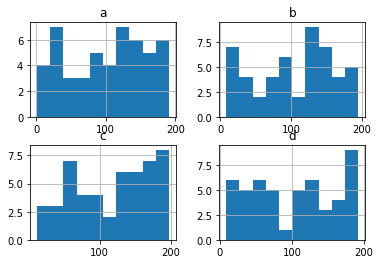

In [92]:
data.hist(bins=10);

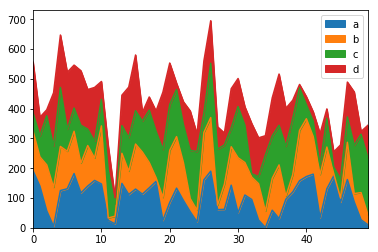

In [94]:
data.plot.area();

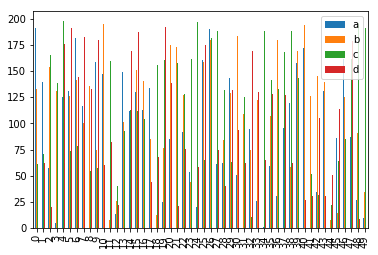

In [96]:
data.plot.bar();

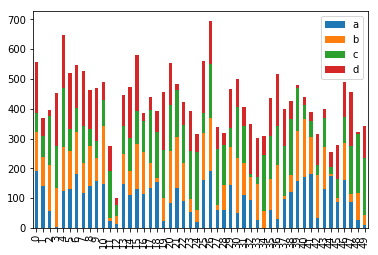

In [98]:
data.plot.bar(stacked=True);

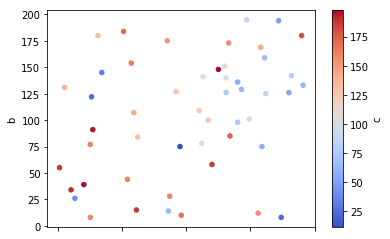

In [111]:
data.plot.scatter(x='a', y ='b', c='c', cmap='coolwarm');

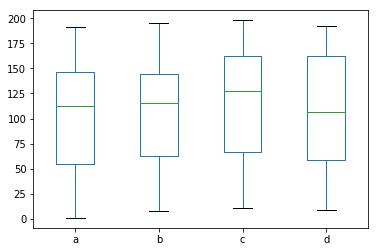

In [112]:
data.plot.box();

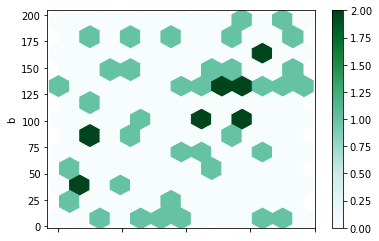

In [122]:
data.plot.hexbin(x='a', y='b', gridsize=12);

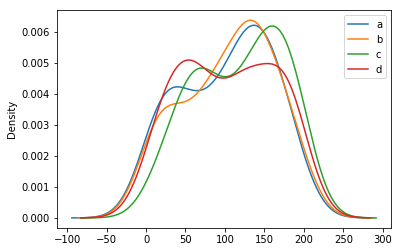

In [123]:
# kernel density estimation (KDE),
# Gráfica de Estimación de densidad de kernel utilizando núcleos gaussianos.
data.plot.kde();